In [1]:
from sklearn import datasets
import pandas as pd

iris_datas = datasets.load_iris()
iris_datas = pd.DataFrame(iris_datas['data'])

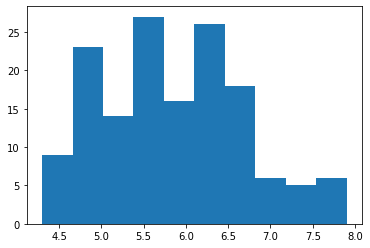

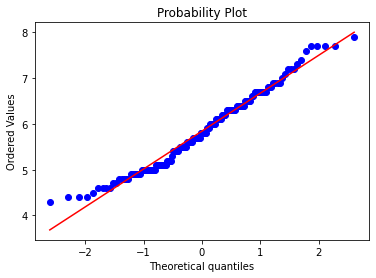

In [10]:
import matplotlib.pyplot as plt
from scipy.stats import probplot

def qqplot(s):
    plt.hist(s)
    plt.show()
    probplot(s, plot=plt)

qqplot(iris_datas[0])

In [11]:
from scipy import stats

def ksTest(s):
	print("H0 (pvalue > alpha): It is normal distributed. ")
	print("H1 (pvalue < alpha): It isn't normal distributed. ")
	print(stats.kstest(s, 'norm', (s.mean(), s.std())))

ksTest(iris_datas[0])

H0 (pvalue>0.05): It is normal distributed. 
H1 (pvalue<0.05): It isn't normal distributed. 
KstestResult(statistic=0.08865361377316261, pvalue=0.1781373784859167)


In [13]:
from scipy.stats import t

def mu_t_ci(s,alpha=0.05):
    mean=s.mean()
    sigma=s.std()
    minv=mean-sigma/s.shape[0]*t.ppf(1-alpha/2,s.shape[0]-1)
    maxv=mean+sigma/s.shape[0]*t.ppf(1-alpha/2,s.shape[0]-1)
    return minv,maxv

mu_t_ci(iris_datas[0])

(5.832424869460842, 5.854241797205828)

In [22]:
from scipy.stats import chi2
import numpy as np

def sigma_ci(s,alpha=0.05):
    z1=chi2.ppf(1-alpha/2,s.shape[0])
    z2=chi2.ppf(alpha/2,s.shape[0])
    minv=s.var()*(s.shape[0]-1)/z1
    maxv=s.var()*(s.shape[0]-1)/z2
    return minv,maxv

sigma_ci(iris_datas[0])

(0.5498820642301656, 0.8659469675697762)

In [34]:
seq = [1,0,1,1,0,0,1,0]

from scipy.stats import t

def mu_t_ci(s,alpha=0.05):
    mean=s.mean()
    sigma=s.std()
    minv=mean-sigma/s.shape[0]*t.ppf(1-alpha/2,s.shape[0]-1)
    maxv=mean+sigma/s.shape[0]*t.ppf(1-alpha/2,s.shape[0]-1)
    return minv,maxv

mu_t_ci(pd.Series(seq))

(0.34200689650468774, 0.6579931034953123)

In [32]:
import numpy as np
from scipy.stats import t

def tTest(s,mu,h0="=="):
    sigma = s.std()
    n = s.shape[0]
    T = (s.mean()-mu)/(sigma/np.sqrt(n))
    if h0=="==":
        print("H0 (pvalue > alpha): It's mean == {0}. ".format(mu))
        print("H1 (pvalue < alpha): It's mean \= {0}. ".format(mu))
        p = 2 * (1 - t.cdf(abs(T),n-1))
    elif h0==">=":
        print("H0 (pvalue > alpha): It's mean >= {0}. ".format(mu))
        print("H1 (pvalue < alpha): It's mean < {0}. ".format(mu))
        p = t.cdf(T,n-1)
    elif h0=="<=":
        print("H0 (pvalue > alpha): It's mean <= {0}. ".format(mu))
        print("H1 (pvalue < alpha): It's mean > {0}. ".format(mu))
        p = 1 - t.cdf(T,n-1)
    print("statistic: ",T)
    print("pvalue ",p)

seq = pd.Series([0,1,1,1,0,0,0])
tTest(seq,0.5,h0=">=")

H0 (pvalue > alpha): It's mean >= 0.5. 
H1 (pvalue < alpha): It's mean < 0.5. 
statistic:  -0.35355339059327395
pvalue  0.36788242993990594


In [107]:
import numpy as np
from scipy.stats import t

def pairedtTest(x,y,h0="=="):
    sigmax = x.std()
    sigmay = y.std()
    n1 = x.shape[0]
    n2 = y.shape[0]
    sw = np.sqrt(((n1-1)*sigmax**2+(n2-1)*sigmay**2)/(n1+n2-2))
    T = (x.mean()-y.mean())/(sw*np.sqrt(1/n1+1/n2))
    if h0=="==":
        print("H0 (pvalue > alpha): Mean x == Mean y. ")
        print("H1 (pvalue < alpha): Mean x \= Mean y. ")
        p = 2 * (1 - t.cdf(abs(T),(n1+n2-2)/2))
    elif h0==">=":
        print("H0 (pvalue > alpha): Mean x >= Mean y. ")
        print("H1 (pvalue < alpha): Mean x < Mean y. ")
        p = t.cdf(T,(n1+n2-2)/2)
    elif h0=="<=":
        print("H0 (pvalue > alpha): Mean x <= Mean y. ")
        print("H1 (pvalue < alpha): Mean x > Mean y. ")
        p = 1 - t.cdf(T,(n1+n2-2)/2)
    print("statistic: ",T)
    print("pvalue ",p)

seq=pd.Series([0,1,1,1,0,0,0,1])
seq1=pd.Series([0,1,1,1,1,0,0])

In [112]:
import numpy as np
from scipy.stats import t

def doubletTest(x,y,h1="\="):
    sigmax = x.std()
    sigmay = y.std()
    n1 = x.shape[0]
    n2 = y.shape[0]
    sw = np.sqrt(((n1-1)*sigmax**2+(n2-1)*sigmay**2)/(n1+n2-2))
    T = (x.mean()-y.mean())/(sw*np.sqrt(1/n1+1/n2))
    if h1=="\=":
        print("H0 (pvalue > alpha): Mean x == Mean y. ")
        print("H1 (pvalue < alpha): Mean x \= Mean y. ")
        p = 2 * (1 - t.cdf(abs(T),n1+n2-2))
    elif h1=="<":
        print("H0 (pvalue > alpha): Mean x >= Mean y. ")
        print("H1 (pvalue < alpha): Mean x < Mean y. ")
        p = t.cdf(T,n1+n2-2)
    elif h1==">":
        print("H0 (pvalue > alpha): Mean x <= Mean y. ")
        print("H1 (pvalue < alpha): Mean x > Mean y. ")
        p = 1 - t.cdf(T,n1+n2-2)
    print("statistic: ",T)
    print("pvalue ",p)

doubletTest(seq,seq1)

H0 (pvalue > alpha): Mean x == Mean y. 
H1 (pvalue < alpha): Mean x \= Mean y. 
statistic:  -0.258198889747161
pvalue  0.8002959873970545


In [109]:
from scipy.stats import ttest_ind

ttest_ind(seq,seq1)

Ttest_indResult(statistic=-0.25819888974716104, pvalue=0.8002959873970544)

In [132]:
import numpy as np
from sklearn.utils import resample

def median(seq):
    return seq.median()

def bootstrap_ci(s,func,alpha=0.05,n=0.5,rounds = 1000):
    if type(n)==float:
        n = int(len(s)*n)
    thetas = []
    for i in range(rounds):
        samples = resample(s,n_samples=n)
        thetas.append(func(samples))
    thetas = np.array(thetas)
    return np.percentile(thetas,alpha/2*100),np.percentile(thetas,(1-alpha/2)*100)

seq=pd.Series(np.random.randn(100))
bootstrap_ci(seq,median)

(-0.36888981628162604, 0.35305887893829735)

/Users/harmonialeo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.01115687848646376

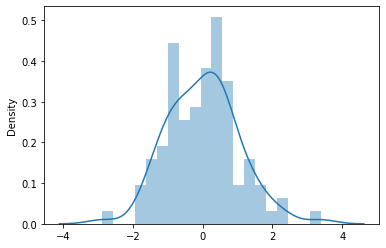

In [133]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.distplot(seq,hist=True,kde=True,bins=20,label="None")
seq.median()